<h1><strong>GRADIENTE DESCENDENTE</strong></h1>



<h1><strong>Função de custo</strong></h1>

> **Mean squared error**

$$(\frac {1} {n}) {\sum_ {i = 1} ^ {n} (y_ {i} - (wx_ {i} + b)) ^ {2}}$$



```
current_cost = mean_squared_error(y, y_predicted)
```







<h1><strong>Derivadas parciais</strong></h1>

> **Weights**

$$\frac {dJ} {dw} = (\frac {-2} {n}) {\sum_ {i = 1} ^ {n} x_i * (y_ {i} - (wx_ {i} + b))}$$



```
weight_derivative = -(2/N) * sum(x * (y-y_predicted))

```



> **Bias**

$$\frac {dJ} {db} = (\frac {-2} {n}) {\sum_ {i = 1} ^ {n} (y_ {i} - (wx_ {i} + b))}$$


```
bias_derivative = -(2/N) * sum(y-y_predicted)
```



<h1><strong>Atualização de parametros</strong></h1>


> **Atualização de pesos**
$$ w = w - (α \frac {dJ} {db})$$

> **Atualização de bias**
$$ b = b - (α \frac {dJ} {db})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

plt.style.use('ggplot')

# **Dados**

In [2]:
  # Data
X, Y = make_regression(20000,1, noise=16)

# **Funções**

In [3]:
def mean_squared_error(y_true, y_predicted):
    # Calculating the loss or cost
    return np.sum((y_true-y_predicted)**2) / len(y_true)

def mean_absolute_error(y_true, y_predicted):
    # Calculating the loss or cost
    return np.mean(np.abs(y_true-y_predicted))

In [4]:
def Batch_Gradient_Descent(x, y, iterations = 1000, learning_rate = 0.0001,stopping_threshold = 1e-6,verbose=False):
    assert len(x.shape) == 1
    assert len(y.shape) == 1

    # Initializing weight, bias, learning rate and iterations
    b, w = np.zeros(2)
  
    N = float(len(x))
      
    costs = list()
    weights = list()
    previous_cost = None
      
    # Estimation of optimal parameters 
    for i in range(iterations):
          
        # CALCULATE PREDICT
        y_predicted = x.dot(w) + b
          
        # CALCULATE COST
        current_cost = mean_squared_error(y, y_predicted)

        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold: break
        previous_cost = current_cost              

        # CALCULATE GRADIENTS
        gradient_w = -(2/N) * np.sum(x.dot(y-y_predicted))
        gradient_b = -(2/N) * np.sum(y-y_predicted)
          
        # UPDATING WEIGHTS AND BIAS
        w = w - (learning_rate * gradient_w)
        b = b - (learning_rate * gradient_b)

        costs.append(current_cost)
        weights.append(w)                  
        # Printing the parameters for each 1000th iteration
        if verbose:
          print(f"Iteration {i+1}: Cost {current_cost}, Weight {w}, Bias {b}")

    return w, b



In [5]:
def Min_Batch_Gradient_Descent(x, y, iterations = 1000,learning_rate=0.1,decay = 0.001,batch_size=20):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  learning_schedule = (lambda eta,epoch,decay=decay: eta * 1/(1 + decay * epoch))
  N = len(x)
  b, w = np.zeros(2)
  costs = list()
  weights = list()
  previous_cost = None
  for epoch in range(iterations):
      shuffled_ind = np.random.permutation(N)
      X_shuffled = x[shuffled_ind]
      y_shuffled = y[shuffled_ind]

      for i in range(0, N, batch_size):

          xi = X_shuffled[i:i+batch_size]
          yi = y_shuffled[i:i+batch_size]

          # CALCULATE PREDICT
          y_predicted = xi.dot(w) + b
            
          # CALCULATE COST
          current_cost = mean_squared_error(yi, y_predicted)
          gradient_w = -(2/batch_size) * np.sum(xi.dot(yi-y_predicted))
          gradient_b = -(2/batch_size) * np.sum(yi-y_predicted)

          w = w - learning_rate * gradient_w
          b = b - learning_rate * gradient_b

          learning_rate = learning_schedule(learning_rate,epoch)

  return w,b


In [6]:
def Stochastic_Gradiend_Descent(x, y, iterations = 100,learning_rate=0.1,decay = 0.001,batch_size=20):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  learning_schedule = (lambda eta,epoch,decay=decay: eta * 1/(1 + decay * epoch))
  N = len(x)
  b, w = np.zeros(2)
  time = 0
  costs = list()
  weights = list()
  previous_cost = None

  for epoch in range(iterations):
          random_index = np.random.randint(N,size=batch_size) # obtém instância aleatória
          xi = x[random_index]
          yi = y[random_index]

          # CALCULATE PREDICT
          y_predicted = xi.dot(w) + b
            
          # CALCULATE COST
          current_cost = mean_squared_error(yi, y_predicted)

          # if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold: break
          # previous_cost = current_cost              

          # CALCULATE GRADIENTS
          gradient_w = -(2/batch_size) * np.sum(xi.dot(yi-y_predicted))
          gradient_b = -(2/batch_size) * np.sum(yi-y_predicted)
          
          # ATUALIZA OS PARAMETROS
          w = w - learning_rate * gradient_w
          b = b - learning_rate * gradient_b

          learning_rate = learning_schedule(learning_rate,epoch)
          
          costs.append(current_cost)
          weights.append(w)   
  return w,b


# **Chamadas**

In [7]:
ite = 15
eta = 0.001

# Estimating weight and bias using Stochastic Gradiend Descent
estimated_weight, eatimated_bias = Stochastic_Gradiend_Descent(X.flatten(), Y.flatten(), iterations = ite,learning_rate=eta,decay = 0.001)
Y_pred_sgd = estimated_weight*X + eatimated_bias
print(f"""
Stochastic Gradiend Descent -> Estimated Weight: {estimated_weight} Estimated Bias: {eatimated_bias}  Error: {np.round(mean_absolute_error(Y, Y_pred_sgd),2)}
""")

# Estimating weight and bias using Mini Batch Gradient Descent
estimated_weight, eatimated_bias = Min_Batch_Gradient_Descent(X.flatten(), Y.flatten(), iterations = ite,batch_size=50,learning_rate=eta)
Y_pred_mbgd = estimated_weight*X + eatimated_bias

print(f"""
Mini Batch Gradient Descent -> Estimated Weight: {estimated_weight} Estimated Bias: {eatimated_bias}  Error: {np.round(mean_absolute_error(Y, Y_pred_mbgd),2)}
""")

# Estimating weight and bias using Batch Gradient Descent
estimated_weight, eatimated_bias = Batch_Gradient_Descent(X.flatten(), Y.flatten(), iterations=ite,learning_rate=eta)
Y_pred_bgd = estimated_weight*X + eatimated_bias

print(f"""
Batch Gradient Descent -> Estimated Weight: {estimated_weight} Estimated Bias: {eatimated_bias} Error: {np.round(mean_absolute_error(Y, Y_pred_bgd),2)}
""")


Stochastic Gradiend Descent -> Estimated Weight: 0.4153451798617602 Estimated Bias: 0.031096954540799394  Error: 17.53


Mini Batch Gradient Descent -> Estimated Weight: 12.970254302792336 Estimated Bias: 0.07955246087384836  Error: 20.4


Batch Gradient Descent -> Estimated Weight: 0.4475393566719628 Estimated Bias: 0.0003653759222324792 Error: 17.53



# **Resultados**

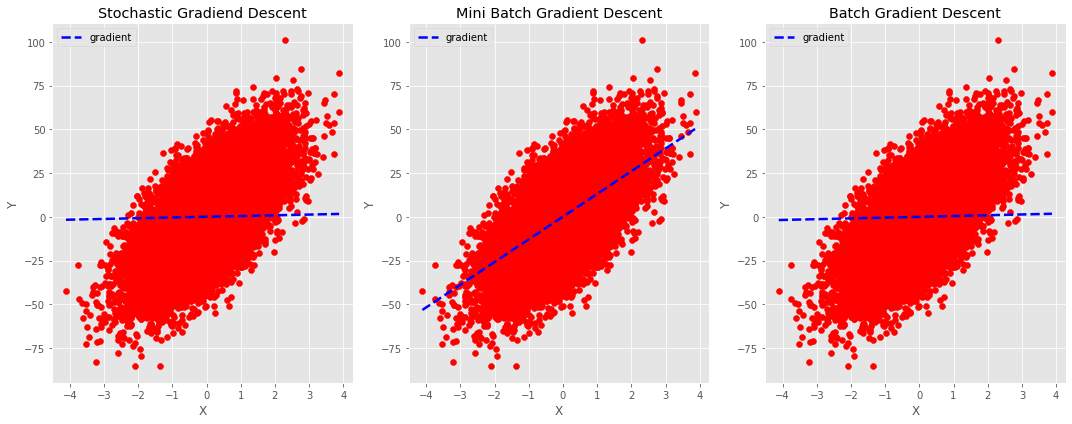

In [8]:
# Plotting the regression line
fig,axes = plt.subplots(1,3,figsize = (15,6))
preds = [Y_pred_sgd,Y_pred_mbgd,Y_pred_bgd]
title = ['Stochastic Gradiend Descent','Mini Batch Gradient Descent','Batch Gradient Descent']

for ax,Y_pred,t in zip(axes,preds,title):
  ax.scatter(X, Y, marker='o', color='red')
  ax.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',linewidth=2.5,markersize=10,linestyle='dashed',label='gradient')
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_title(t)
  ax.legend()
  
fig.tight_layout()